# バックテスト検証ノート

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../'

/home/tsu-nera/repo/bakuchi


In [3]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [4]:
# timestamp="2003142355"
timestamp="2003110046"

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(17703, 17703)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=1500, profit_margin_diff=1000)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-11 00:54:22,coincheck,liquid,BTC/JPY,0.009,14
1,2020-03-11 00:54:26,liquid,coincheck,BTC/JPY,0.009,-4
2,2020-03-11 00:59:17,liquid,coincheck,BTC/JPY,0.009,15
3,2020-03-11 00:59:26,coincheck,liquid,BTC/JPY,0.009,-1
4,2020-03-11 00:59:30,coincheck,liquid,BTC/JPY,0.009,17
5,2020-03-11 00:59:36,liquid,coincheck,BTC/JPY,0.009,-3
6,2020-03-11 01:02:04,coincheck,liquid,BTC/JPY,0.009,14
7,2020-03-11 01:02:06,liquid,coincheck,BTC/JPY,0.009,-1
8,2020-03-11 01:18:11,liquid,coincheck,BTC/JPY,0.009,16
9,2020-03-11 01:18:19,coincheck,liquid,BTC/JPY,0.009,-3


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-11 00:54:22,買い,coincheck,812377.0
1,2020-03-11 00:54:22,売り,liquid,814006.0
2,2020-03-11 00:54:26,買い,liquid,813038.0
3,2020-03-11 00:54:26,売り,coincheck,812577.0
4,2020-03-11 00:59:17,買い,liquid,810135.0
5,2020-03-11 00:59:17,売り,coincheck,811815.0
6,2020-03-11 00:59:26,買い,coincheck,807879.0
7,2020-03-11 00:59:26,売り,liquid,807669.0
8,2020-03-11 00:59:30,買い,coincheck,807879.0
9,2020-03-11 00:59:30,売り,liquid,809828.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
--------  -------------------
開始日時  2020-03-11 00:46:39
終了日時  2020-03-11 07:00:19
--------  -------------------
利確しきい値 1500(JPY)
損切りマージン 1000(JPY)
取引単位 0.009(BTC)
--------

バックテスト結果
---------  ------
利益(BTC)  -0
元金(BTC)   0.022
資産(BTC)   0.022
---------  ------
---------  -----
取引回数      30
利益(JPY)    214
元金(JPY)  12000
資産(JPY)  12214
---------  -----


## グラフ出力

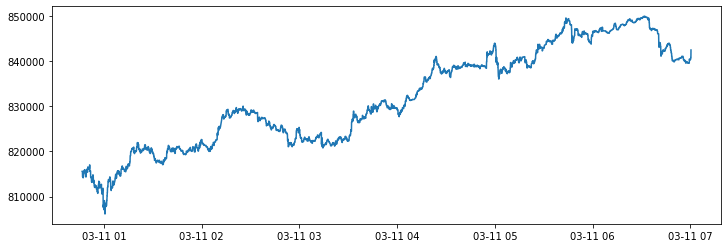

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

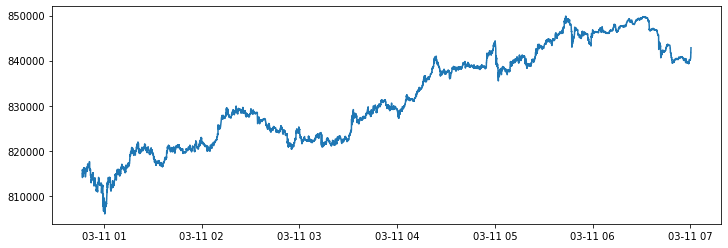

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-11 00:40:00,-146,-426,815312,815739,815542,815688
2020-03-11 00:50:00,-208,-402,812860,813262,813092,813300
2020-03-11 01:00:00,-429,-198,812706,812904,812713,813142
2020-03-11 01:10:00,-365,-132,817781,817912,817737,818102
2020-03-11 01:20:00,-572,-26,820463,820489,820307,820879
2020-03-11 01:30:00,-699,212,818395,818183,818043,818741
2020-03-11 01:40:00,-302,-202,820293,820495,820368,820669
2020-03-11 01:50:00,-167,-358,820660,821017,820871,821038
2020-03-11 02:00:00,-439,-91,821459,821550,821404,821843
